### 배경 

다가오는 명절에 특수를 누리기 위해 럭키백을 가져오기로 했다.

럭키백에 포함된 생선의 확률을 알려주는 방향으로 이벤트를 만들었다. <br>
가령 A 럭키백에 도미 확률이 높다고 표시하면 도미를 원한 고객은 A 럭키백을 구매할 것이다.

그렇다면 어떻게 생선의 확률을 구할 지가 문제일 텐데, 머신러닝으로 생선이 어떤 타깃에 속하는지 <br>
확률을 구할 수 있을까?

### 럭키백의 확률

럭키백에 들어갈 생선은 7개이다. 이 이벤트를 잘 마치려면 <br>
럭키백에 들어간 생선의 크기, 무게 등이 주어졌을 때 7개 생선에 대한 확률을 출력해야 한다.

이번에는 길이, 높이, 두께 외에도 대각선 길이와 무게도 사용할 수 있다.

확률은 숫자니까 회귀 문제일까 ? 아니면 7개의 생선에 대한 문제라면 분류일까 ? <br>


그러다가 번득이는 아이디어가 생각났다. k-최근접 이웃은 주변 이웃을 찾아주니까 <br>
클래스 비율을 확률이라고 출력하면 되지 않을까?

177페이지의 그림을 보면, 샘플 X 주위에 가까운 이웃 샘플 10개를 표시하였다. <br>
사각형이 3개, 삼각형이 5개, 원이 2개이다.

이웃한 샘플의 클래스를 확률로 삼는다면 샘플 X가 사각형일 확류른 30%, 삼각형일 확률은 50%, 원일 확률은 20%이다. <br>

사이킷런의 k-최근접 이웃 분류기도 이와 동일한 방법으로 클래스 확률을 계산하여 제공한다. 

데이터를 준비하고, k-최근접 이웃 분류기로 럭키백에 들어간 생선의 확률을 계산하여 보자.

### 데이터 준비하기
<br> https://bit.ly/fish_csv_data

판다스의 read_csv 함수로 csv 파일을 데이터프레임으로 변환한 다음 head() 메서드로 처음 5개 행을 출력해 보겠다.

In [1]:
import pandas as pd 
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


그럼 어떤 종류의 생선이 있는지 Species 열에서 고유한 값을 추출해 보겠다.

In [2]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


이 데이터프레임에서 Species 열을 타깃으로 만들고 나머지 5개 열은 입력 데이터로 사용하겠다.

데이터프레임에서 열을 선택하는 방법은 간단하다. 데이터프레임에서 원하는 열을 리스트로 나열하면 된다.

Species 열을 빼고 나머지 5개 열을 선택해 보겠다.( 변수 이름 : fish_input)

In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [4]:
fish_target = fish['Species'].to_numpy()

Species 열을 선택할 때 fish[['Species']] 처럼 두 개의 괄호 선택하지 않는다. 선택하면 2차원 배열이 된다.

train_test_split 통해 데이터 세트 2개를 만들어 보자

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input , train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

여기에서도 훈련 세트와 테스트 세트를 표준화 하겠다. <br>
여기에서도 StandardScaler 통해 표준화 해 보자.

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

필요한 데이터를 모두 모았다. 이제 k-최근접 이웃 분류기로 테스트 세트에 들어 있는 확률을 예측해 보겠다.

### k-최근접 이웃 분류기의 확률 예측

In [7]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.7983193277310925
0.85


여기에서는 클래스 확률을 배우는 것이기 때문에 훈련 점수와 테스트 점수는 잠시 잊겠다.

앞서 fish 데이터프레임에서 7개의 생선이 있었던 것을 기억하는가? 타깃 데이터를 만들 때 <br>
fish['Species'] 를 사용하여 만들었기 때문에 훈련 세트와 테스트 세트의 타깃 데이터에도 7개의 생선 종류가 들어가 있다.

이렇게 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 ***다중 분류*** 라고 한다.

2장에서 만들었던 이진 분류와 모델을 만들고 훈련하는 방식은 동일하다. 이진 분류를 사용했을 때는 <br>
양성 클래스와 음성 클래스를 각각 0과 1로 지정하여 타깃 데이터를 만들었다.

다중 분류에서도 타깃값을 숫자로 바꾸어 입력할 수 있지만 사이킷런에서는 편리하게도 문자열로 된 타깃값을 그대로 사용할 수 있다.

이때 주의할 점이 있다. 타깃값을 그대로 사이킷런에 전달하면 순서가 자동으로 알파벳 순으로 매겨진다.

따라서 pd.unique(fish['Species']) 로 출력했던 순서와 다르다. <br>
KNeighborsClassifier 에서 정렬된 타깃값은 classes_ 속성에 저장되어 있다.

In [8]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


Bream이 첫번째 클래스, Parkki가 두번째 클래스가 된다. predict 메서드는 친절하게도 타깃값으로 예측을 출력한다.

테스트 세트에 있는 처음 5개 샘플의 타깃값을 예측해 보겠다.

In [9]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


이 5개 샘플에 대한 예측은 어느 확률로 만들어졌을까? 사이킷런의분류 모델은 predict_proba() 메서드로 클래스별 확률값을 반환한다.

테스트 세트에 있는 처음 5개의 샘플에 대한 확률을 출력해 보자. 

numpy . round() 함수는 기본적으로 소수점 첫째 자리에서 반올림을 하는데, <br>
decimals 매개변수로 유지할 소수점 아래 자릿수를 지정할 수 있다.

In [10]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))
# 책의 값과 다르게 나온다.

[[0.  0.  0.6 0.  0.4 0.  0. ]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.2 0.8 0.  0.  0. ]
 [0.  0.  0.8 0.  0.2 0.  0. ]
 [0.  0.  0.8 0.  0.2 0.  0. ]]


predict_proba() 메서드의 출력 순서는 앞서 보았던 classes_속성과 같다. <br>
즉 첫번째 열이 'Bream'에 대한 확률, 두번째 열이 'Parkki' 에 대한 확률이다.

이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인해 보자. <br>
네 번째 샘플의 최근접 이웃의 클래스를 확인해 보겠다.

kneighbors() 메서드의 입력은 2차원 배열이여야 한다. 이를 위해 넘파이 배열의 슬라이싱 연산자를 사용하였다.
<br> 슬라이싱 연산자는 하나의 샘플만 선택해도 항상 2차원 배열이 만들어진다.

여기에서는 네번째 샘플 하나를 선택하였다.

In [11]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch' 'Perch' 'Perch']]


실제 책의 답 : [['Roach', 'Perch', 'Perch']] <br>
이 샘플의 이웃은 다섯 번째 클래스인 Roach가 1이고 세번째 클래스인 'Perch'가 2개이다.

따라서 다섯번째 클래스에 대한 확률은 1/3 = 0.3333이고, 세 번째 클래스에 대한 확률은 2/3 = 0.6667이 된다.

앞서 출력한 네 번째 샘플의 클래스 확률과 같다.

성공이다! 아주 쉽게 클래스 확률을 예측하였다. 번거로운 계산은 사이킷런이 수행해 주므로 <br>
우리는 predict_proba() 메서드를 호출하면 그만이다.

그런데 뭔가 좀 이상하다. 혼공머신이 잠시 생각해 보니 3개의 최근접 이웃을 사용하기 때문에<br>
가능한 확률은 0/3, 1/3, 2/3, 3/3 밖에 없다. 만약 럭키백의 확률을 이렇게만 표시한다면 만족스러운 결과가 나오지 못할 것이다.

좀 더 좋은 방법을 찾아야 할 것 같다.

### 로지스틱 회귀

로지스틱 회귀는 이름은 회귀이지만 분류 모델이다. 이 알고리즘은 선형 회귀와 동일하게 선형 방정식을 학습한다.

z = (a * weight) + (b * length) + (c* diagonal) + (d * height) + (e * width) + f 

여기에서 a, b, c, d, e는 가중치 혹은 계수이다. 특성은 늘어났지만 3장에서 다룬 다중 회귀를 위한 선형 방정식과 같다.

z는 어떤 값도 가능하다. 하지만 확률이 되려면 0 ~ 1 사이의 값이 되어야 한다. <br>
* z가 아주 큰 음수일 때 0이 되고, z가 아주 큰 양수일 때 1이 되도록 바꾸는 방법은 없을까?

**시그모이드 함수( 또는 로지스틱 함수)** 를 사용하면 가능하다. ( 183페이지에 있다. )

다음 식이 시그모이드 함수이다. <br>
theta = 1 / ( 1 + e^(-x) ) <br>

그래프는 183페이지에 있다.

선형 방정식의 출력 z의 음수를 사용해 자연상수 e를 거듭제곱하고 1을 더한 값의 역수를 취한다.

이렇게 복잡하게 계산한 이유는 책의 그래프를 만들 수 있기 때문이다. 

z가 무한하게 큰 음수일 경우에 이 함수는 0에 가까워지고, 무한하게 큰 양수일 경우에 1에 가까워진다. <br>
z가 0이 될 때는 0.5가 된다. z가 어떤 값이 되더라도 식의 값은 절대로 0 ~ 1 사이를 벗어날 수 없다.

넘파이를 사용하면 그래프를 간단히 그릴 수 있다. -5와 5 사이에 0.1 간격으로 배열 z를 만든 다음 <br>
z 위치마다 시그모이드 함수를 계산한다. 지수 함수 계산은 np.exp() 함수를 사용한다.

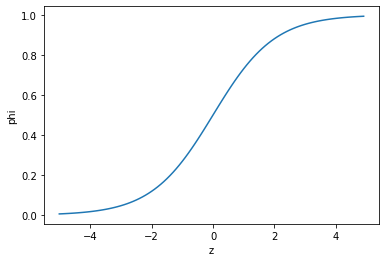

In [12]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1/(1 + np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

시그모이드 함수의 출력은 정말 0에서 1까지 변한다. 그럼 로지스틱 회귀 모델을 훈련해 보자.

사이킷런에는 물론 로지스틱 회귀 모델인 LogisticRegression 클래스가 준비되어 있다.

훈련하기 전에 간단히 2진 분류를 수행해 보겠다.

2진 분류의 경우 시그모이드 함수의 출력이 0.5보다 크면 양성 클래스, 작으면 음성 클래스이다. <br>
그럼 먼저 도미와 빙어 2개를 이용하여 이진 분류를 수행해 보겠다.

### 로지스틱 회귀로 이진 분류 수행하기

넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다. 이를 **불리언 인덱싱**이라 한다.

간단한 예를 보면 금방 이해할 수 있다. 다음과 같이 'A' 에서 'E'까지 5개의 원소로 이루어진 배열이 있다. <br>
여기서 'A'와 'C'만 골라내려면 첫번째와 세번째 원소만 True이고, 나머지 원소는 모두 False 인 배열을 전달하면 된다.

In [13]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


이와 같은 방식을 사용해 훈련 세트에서 도미(Bream)와 빙어(Smelt)의 행만 골라내겠다. <br>
비교 연산자를 사용하려면 도미와 빙어의 행을 모두 True로 만들 수 있다. 

예를 들어 도미인 행을 골라내려면 train_target == 'Bream' 과 같이 쓴다. 이 비교식은 <br>
배열에서 'Bream'인 것은 True 이고 나머지는 모두 False 인 배열을 반환한다.

도미와 빙어에 대한 비교 결과를 비트 OR 연산자(|)를 사용해 합치면 도미와 빙어에 대한 행만 골라낼 수 있다.

In [14]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_input[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

bream_smelt_indexes 배열은 도미와 빙어일 경우 True이고 그 외에는 모두 False 값이 들어가 있다. <br>
따라서 이 배열을 사용해 train_scaled와 train_target 배열에 불리언 인덱싱을 적용하면 손쉽게 도미와 빙어 데이터만 골라낼 수 있다.

이제 이 데이터로 로지스틱 회귀 모델을 훈련해 보겠다. LogisticRegression 모델은 선형 모델이므로 <br>
sklearn . linear_model 패키지 아래에 있다.

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

훈련한 모델을 사용해 train_bream_smelt에 있는 처음 5개의 샘플을 예측해 보자.

In [16]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


두번째 샘플을 제외하고는 모두 도미로 예측했다. KNeighborsClassifier 와 마찬가지로 예측 확률은 predict_proba 에서 제공한다.

train_bream_smelt에서 처음 5개 샘플의 예측 확률을 출력해 보겠다.

In [17]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[1.00000000e+00 1.43563281e-20]
 [2.41846605e-05 9.99975815e-01]
 [1.00000000e+00 3.76077089e-17]
 [1.00000000e+00 4.87981634e-13]
 [1.00000000e+00 2.27882416e-20]]


5개의 샘플 예측 역시 값과 다르다.

샘플마다 2개의 확률이 출력되었다. 첫 번째 열이 음성 클래스에 대한 확률이고 두번째 열이 